<center><h3>Loading the consolidated dataset</h3></center>

In [73]:
import pandas as pd

df = pd.read_csv('consolidated_dataset.csv')

<center><h3>Sample</h3></center>

In [74]:
df.head()

,customer_id,customer_name,email,transaction_id,amount,transaction_date
0,1,John Smith,john.smith@email.com,101,784,2023-01-31
1,2,Jane Doe,jane.doe@email.com,102,659,2023-02-28
2,3,Micheal Jonson,m.johnson@email.com,103,729,2023-03-31
3,4,Chris Lee,c.lee@email.com,104,292,2023-04-30
4,5,Katherine Davis,k.davis@email.com,105,935,2023-05-31


<center><h3>Grouping Data by Month</h3></center>

In [75]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract year and month
df['year_month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate data by month
monthly_data = df.groupby('year_month').agg({
    'amount': ['sum', 'mean', 'count']
}).reset_index()

monthly_data.columns = ['year_month', 'total_amount', 'avg_amount', 'transaction_count']

monthly_data.head()



,year_month,total_amount,avg_amount,transaction_count
0,2023-01-01,784,784.0,1
1,2023-02-01,659,659.0,1
2,2023-03-01,729,729.0,1
3,2023-04-01,292,292.0,1
4,2023-05-01,935,935.0,1


<center><h3>Data Analysis with Matplotlib and Seaborn</h3></center>

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

<center><h3>Monthly Spending Trends</h3></center>

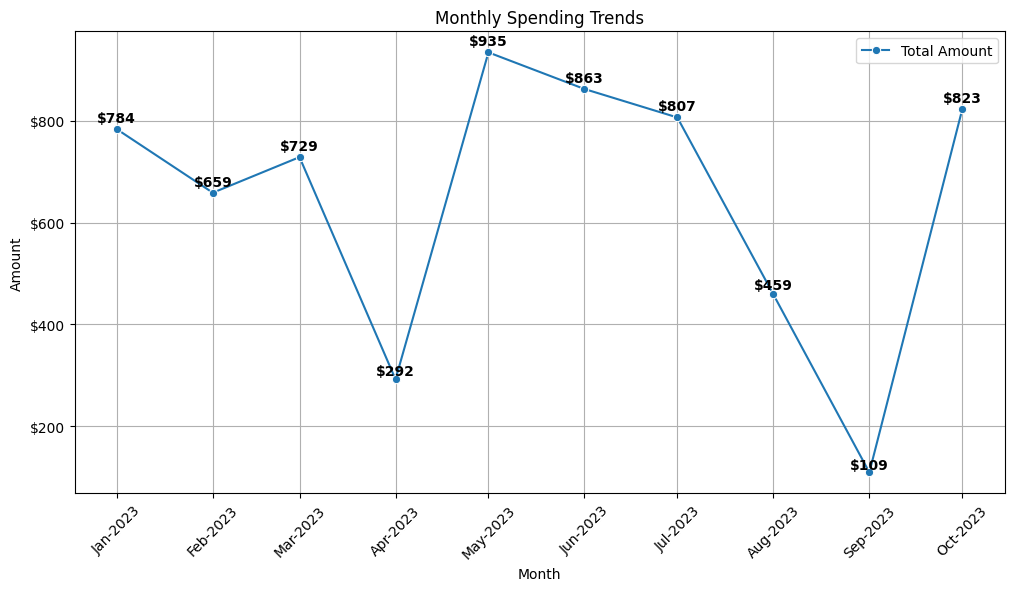

In [138]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='year_month', y='total_amount', marker='o', label='Total Amount')
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
for i in range(len(monthly_data)):
    plt.text(
        monthly_data['year_month'].iloc[i], 
        monthly_data['total_amount'].iloc[i]  + monthly_data['total_amount'].iloc[i] * 0.01,
        f'${monthly_data["total_amount"].iloc[i]:,.0f}',
        ha='center', 
        va='bottom',
        fontsize=10, 
        fontweight='bold'
    )

date_format = DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.title('Monthly Spending Trends')
plt.xlabel('Customer', fontweight='bold')
plt.ylabel('Total Spend', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

<center><h3>Monthly Transaction Trends</h3></center>

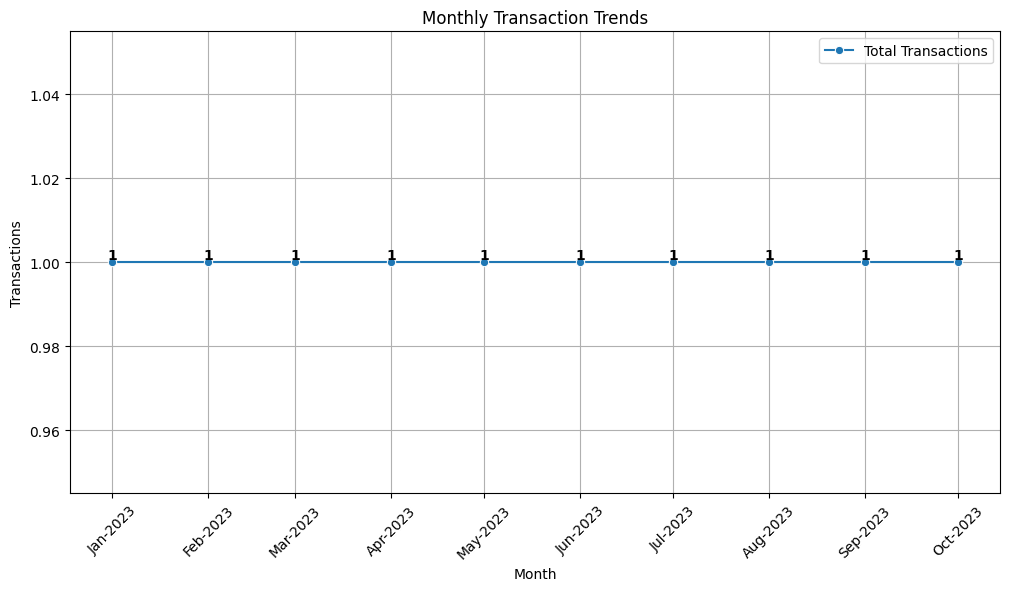

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='year_month', y='transaction_count', marker='o', label='Total Transactions')
for i in range(len(monthly_data)):
    plt.text(
        monthly_data['year_month'].iloc[i], 
        monthly_data['transaction_count'].iloc[i],
        f'{monthly_data["transaction_count"].iloc[i]}',
        ha='center', 
        va='bottom',
        fontsize=10, 
        fontweight='bold'
    )
date_format = DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.title('Monthly Transaction Trends')
plt.xlabel('Customer', fontweight='bold')
plt.ylabel('Total Spend', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

<center><h3>Total Spent by Customer</h3><center>

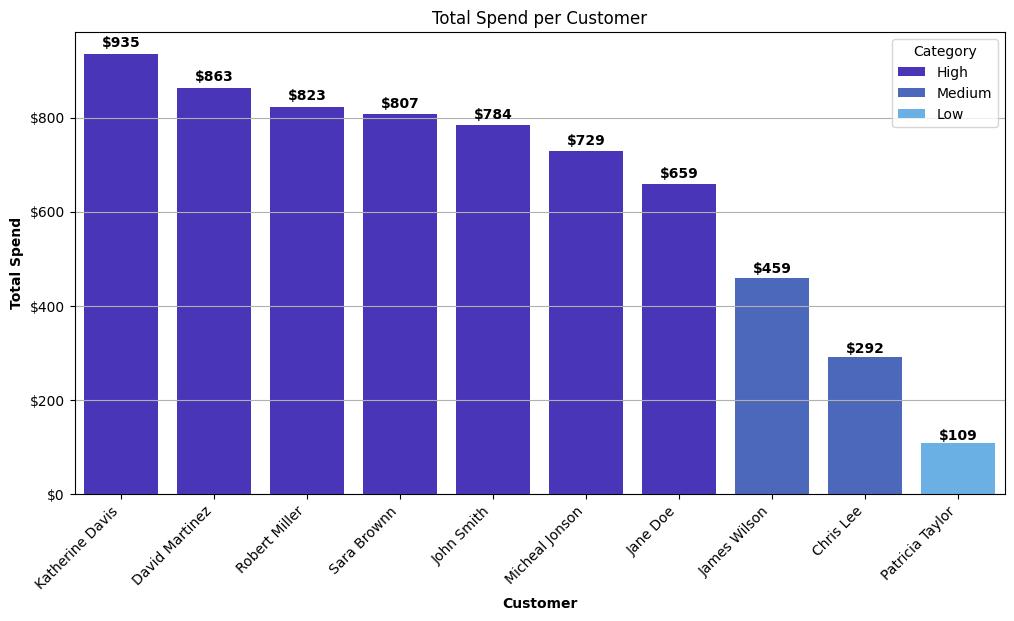

In [148]:
customer_spend = df.groupby('customer_name')['amount'].sum().reset_index()
customer_spend = customer_spend.sort_values(by='amount', ascending=False).reset_index(drop=True)
customer_spend['Category'] = 'other'  # Add a default category
customer_spend.loc[customer_spend['amount'] >= 500, 'Category'] = 'High'  # Add a category for customers who spent more than 100
customer_spend.loc[customer_spend['amount'] < 500, 'Category'] = 'Medium'  # Add a category for customers who spent more than 100
customer_spend.loc[customer_spend['amount'] <= 200, 'Category'] = 'Low'  # Add a category for customers who spent 100 or less
palette = {'medium': '#3A1FCD', 'high': '#3A5FCD', 'low': '#56B3FA'}

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_name', y='amount', hue='Category', data=customer_spend, palette=list(palette.values()))
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
for i in range(len(monthly_data)):
    plt.text(
        customer_spend['customer_name'].iloc[i], 
        customer_spend['amount'].iloc[i]  + customer_spend['amount'].iloc[i] * 0.01,
        f'${customer_spend["amount"].iloc[i]:,.0f}',
        ha='center', 
        va='bottom',
        fontsize=10, 
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.title('Total Spend per Customer')
plt.xlabel('Customer', fontweight='bold')
plt.ylabel('Total Spend', fontweight='bold')
plt.grid(axis='y')
plt.show()